# Design, Development, Analysis and Performance Evaluation of Deep Learning algorithms Workbook

Student : Amali Udage Kankanamge
Id : w21024674

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten,BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('always')

### Data Exploration

#### 1. Data loading

In [2]:
images = np.load('cancer_data/X.npy') 
labels = np.load('cancer_data/Y.npy') 

print(images.shape)
print(labels.shape)


(5547, 50, 50, 3)
(5547,)


In [3]:
print('images min|mean|std|max = %.2f|%.2f|%.2f|%.2f'%(images.min(),
                        images.mean(), images.std(), images.max()))

images min|mean|std|max = 2.00|185.03|47.25|255.00


In [4]:
print('labels min|mean|std|max = %.2f|%.2f|%.2f|%.2f'%(labels.min(),
                        labels.mean(), labels.std(), labels.max()))

labels min|mean|std|max = 0.00|0.50|0.50|1.00


#### 2. Data Distribution Visualization

C:\Anaconda3\lib\site-packages\seaborn\utils.py:538: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(values).astype(np.float)
C:\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
C:\Anaconda3\lib\site-packages\pan

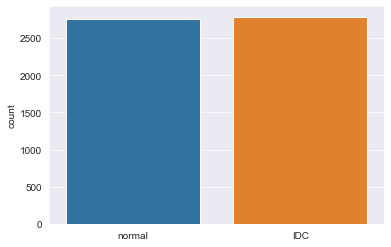

In [5]:
l = []
for i in labels:
    if(i == 0):
        l.append("normal")
    else:
        l.append("IDC")
sns.set_style('darkgrid')
sns.countplot(l)
plt.show()

#### 3. Sample data visualization 

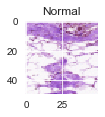

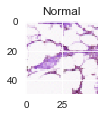

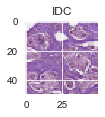

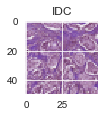

In [6]:
imgsize = 64
plt.subplot(1,4,1)
plt.imshow(cv2.cvtColor(images[1], cv2.COLOR_BGR2RGB))
plt.title('IDC' if labels[1] else "Normal")
plt.axis("on")
plt.show()

plt.subplot(1,4,1)
plt.imshow(cv2.cvtColor(images[2], cv2.COLOR_BGR2RGB))
plt.title('IDC' if labels[2] else "Normal")
plt.axis("on")
plt.show()

plt.subplot(1,4,1)
plt.imshow(cv2.cvtColor(images[5545], cv2.COLOR_BGR2RGB))
plt.title('IDC' if labels[5545] else "Normal")
plt.axis("on")
plt.show()

plt.subplot(1,4,1)
plt.imshow(cv2.cvtColor(images[5546], cv2.COLOR_BGR2RGB))
plt.title('IDC' if labels[5546] else "Normal")
plt.axis("on")
plt.show()

Further, image pixel distribution can be viewed using a histogram to understand different intensities prior pre-processing

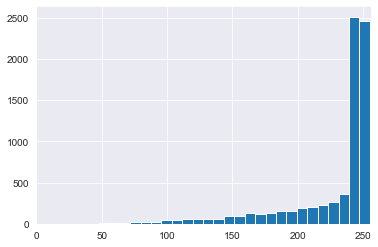

In [7]:
fig, ax = plt.subplots(1, 1)
ax.hist(images[2].ravel(), bins=32, range=[0, 255])
ax.set_xlim(0, 256);
plt.show()

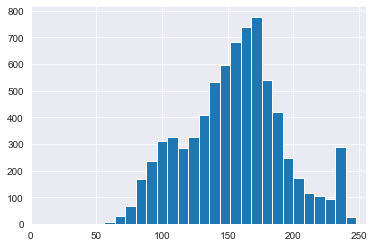

In [8]:
fig, ax = plt.subplots(1, 1)
ax.hist(images[5545].ravel(), bins=32, range=[0, 256])
ax.set_xlim(0, 255);
plt.show()

### Data Preprocessing

#### 1. Data Normalization, Fiteration 

a. Image Normalization  

In [9]:
!pip install -U scikit-image

In [10]:
def normalize_images(images):
        final_images = np.zeros(images.shape)
        for i in range(images.shape[0]): 
            final_images[i] =images[i]
            final_images[i] = final_images[i]/final_images[i].max() 
        #final_images=images/images.max()
        return final_images
       

In [11]:
images1=normalize_images(images)

In [12]:
print(images1.shape)


(5547, 50, 50, 3)


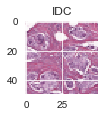

In [13]:
plt.subplot(1,4,1)
plt.imshow(images1[5545],cmap=plt.cm.gray)
plt.title('IDC' if labels[5545] else "Normal")
plt.axis("on")
plt.show()

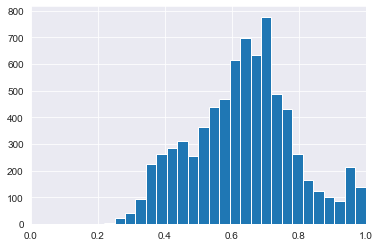

In [14]:
fig, ax = plt.subplots(1, 1)
ax.hist(images1[5545].ravel(), bins=32, range=[0, 1])
ax.set_xlim(0, 1);
plt.show()

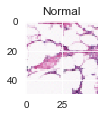

In [15]:
plt.subplot(1,4,1)
plt.imshow(images1[2],cmap=plt.cm.gray)
plt.title('IDC' if labels[2] else "Normal")
plt.axis("on")
plt.show()

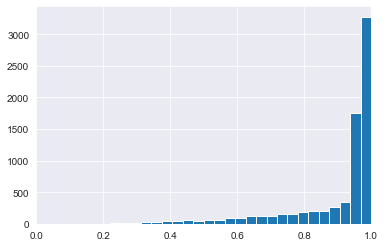

In [16]:
fig, ax = plt.subplots(1, 1)
ax.hist(images1[2].ravel(), bins=32, range=[0, 1])
ax.set_xlim(0, 1);
plt.show()

b. Image filteration using Laplace operator

In [19]:

from skimage.filters import laplace

def filter_data(images):
    final_images = np.zeros(images.shape)
    for i in range(images.shape[0]): 
            final_images[i] =images[i]
            final_images[i]=cv2.GaussianBlur(final_images[i], (3,3), 0)
            final_images[i]=laplace(final_images[i], ksize=3, mask=None)
            final_images[i]=final_images[i]/final_images[i].max()
    return final_images

In [20]:
images2=filter_data(images)


C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:226: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  dtypeobj_out = np.dtype(dtype)
C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:226: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  dtypeobj_out = np.dtype(dtype)
C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:226: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  dtypeobj_out = np.dtype(dtype)
C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:226: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  dtypeobj_out = np.dtype(dtype)
C:\Anaconda3\lib\site-packages\skima

In [21]:
print(images2.shape)

(5547, 50, 50, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


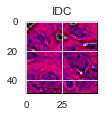

In [22]:
imgsize = 64
plt.subplot(1,4,1)
plt.imshow(images2[5545],cmap=plt.cm.gray)
plt.title('IDC' if labels[5545] else "Normal")
plt.axis("on")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


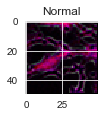

In [23]:
plt.subplot(1,4,1)
plt.imshow(images2[2],cmap=plt.cm.gray)
plt.title('IDC' if labels[2] else "Normal")
plt.axis("on")
plt.show()

#### 2. Preparing training and test data

In [24]:
def reshape_data(images):
    images = images.reshape(images.shape + (1,)) 
    return images

In [25]:
def split_data(images,labels):
    X_train,X_test,Y_train,Y_test=train_test_split(images,labels,test_size=0.3,random_state=1234)
    return X_train,X_test,Y_train,Y_test

In [26]:
def to_one_hot(labels):
    labels=np.array(labels)
    return to_categorical(labels)

##### Prepare normalized data

In [27]:
X_train1,X_test1,Y_train1,Y_test1=split_data(images1,labels)

Y_train1=to_one_hot(Y_train1)
Y_test1=to_one_hot(Y_test1)
print(Y_train1)
    

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [28]:
print(X_train1.shape)
print(X_test1.shape)
print(Y_train1.shape)
print(Y_test1.shape)

(3882, 50, 50, 3)
(1665, 50, 50, 3)
(3882, 2)
(1665, 2)


In [29]:
print('number of classes:',Y_train1.shape)

number of classes: (3882, 2)


##### Prepare filtered Data using laplace

In [30]:
#images2=reshape_data(images2)
X_train2,X_test2,Y_train2,Y_test2=split_data(images2,labels)

Y_train2=to_one_hot(Y_train2)
Y_test2=to_one_hot(Y_test2)
print(Y_train2)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [31]:
print(X_train2.shape)
print(X_test2.shape)
print(Y_train2.shape)
print(Y_test2.shape)

(3882, 50, 50, 3)
(1665, 50, 50, 3)
(3882, 2)
(1665, 2)


In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        rescale=1,
        cval=0,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1 / 255.0)

In [33]:
batch_size = 8
train_generator1 = train_datagen.flow(X_train1, Y_train1, batch_size=batch_size)
#valid_generator1 = train_datagen.flow(X_test1, Y_test1, batch_size=batch_size)
#test_generator1 = test_datagen.flow(X_test1,Y_test1, batch_size=batch_size)

### Classifier Models Building

#### 1. Convolutional Neural Network Model

In [34]:
def build_classfier1(opt):
    model=Sequential()

    model.add(Conv2D(filters=64,kernel_size=(5,5),input_shape=(50, 50,3),activation='relu',padding="same"))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(50, 50,3),activation='relu',padding="same"))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding="same"))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Flatten()) 
    
    model.add(Dense(512,activation='relu'))
    BatchNormalization()
    model.add(Dropout(0.5))
    
    model.add(Dense(128,activation='relu'))
    BatchNormalization()
    model.add(Dropout(0.5))
    
    model.add(Dense(2,activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    print(model.summary())
    return model

In [35]:
opt = Adam(learning_rate=0.0001)
model1=build_classfier1(opt)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        1

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

def history(model,epochs,X_train,Y_train,X_test,Y_test,train_generator):
    callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
    seed = 1234
    np.random.seed(seed)
    history=model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // batch_size,
    validation_data=(X_test,Y_test),
    #validation_steps=len(X_test) // batch_size,
    epochs=epochs,
    callbacks=[callback],
    verbose=1)
    print(len(history.history['loss']))
    return history


1. Train CNN model with normalized histopathological image data

In [37]:
epochs1=100
cnn_history=history(model1,epochs1,X_train1,Y_train1,X_test1,Y_test1,train_generator1)


Epoch 1/100
485/485 [==============================] - 11s 23ms/step - loss: 0.6956 - accuracy: 0.5163 - val_loss: 0.6761 - val_accuracy: 0.6282
Epoch 2/100
485/485 [==============================] - 11s 23ms/step - loss: 0.6584 - accuracy: 0.6074 - val_loss: 0.5986 - val_accuracy: 0.7309
Epoch 3/100
485/485 [==============================] - 11s 23ms/step - loss: 0.6029 - accuracy: 0.6809 - val_loss: 0.5869 - val_accuracy: 0.7141
Epoch 4/100
485/485 [==============================] - 11s 23ms/step - loss: 0.5780 - accuracy: 0.7207 - val_loss: 0.5599 - val_accuracy: 0.7435
Epoch 5/100
485/485 [==============================] - 11s 24ms/step - loss: 0.5770 - accuracy: 0.7238 - val_loss: 0.5292 - val_accuracy: 0.7556
Epoch 6/100
485/485 [==============================] - 12s 24ms/step - loss: 0.5598 - accuracy: 0.7303 - val_loss: 0.5433 - val_accuracy: 0.7574
Epoch 7/100
485/485 [==============================] - 12s 24ms/step - loss: 0.5520 - accuracy: 0.7377 - val_loss: 0.5149 - val_ac

In [41]:
acc = cnn_history.history['accuracy']
val_acc = cnn_history.history['val_accuracy']
loss = cnn_history.history['loss']
val_loss = cnn_history.history['val_loss']
hist_len= len(cnn_history.history['loss'])

In [42]:
def plot_loss_and_accuracy_curve(epochs,acc,val_acc,loss,val_loss,hist_len):
    epochs_range = range(hist_len)

    plt.figure(figsize=(15, 15))
    plt.subplot(2, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

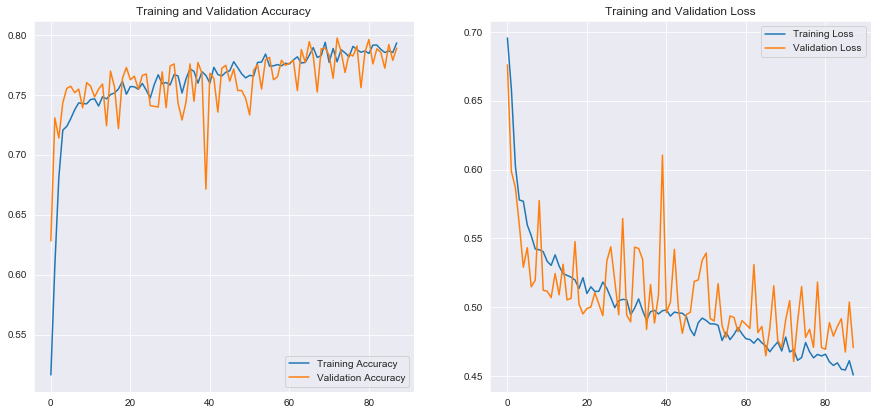

In [43]:
plot_loss_and_accuracy_curve(epochs1,acc,val_acc,loss,val_loss,hist_len)

In [44]:


preds = model1.predict(X_test1)
pred_final = np.where(preds>0.5,1,0)
pred_final

array([[0, 1],
       [0, 1],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [0, 1]])

In [45]:
!pip install mlxtend

You should consider upgrading via the 'c:\anaconda3\python.exe -m pip install --upgrade pip' command.
C:\Anaconda3\lib\site-packages\IPython\utils\_process_win32.py:131: ResourceWarning: unclosed file <_io.BufferedWriter name=6>
  return process_handler(cmd, _system_body)
C:\Anaconda3\lib\site-packages\IPython\utils\_process_win32.py:131: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  return process_handler(cmd, _system_body)
C:\Anaconda3\lib\site-packages\IPython\utils\_process_win32.py:131: ResourceWarning: unclosed file <_io.BufferedReader name=8>
  return process_handler(cmd, _system_body)


Confusion Matrix
[[637 200]
 [151 677]]


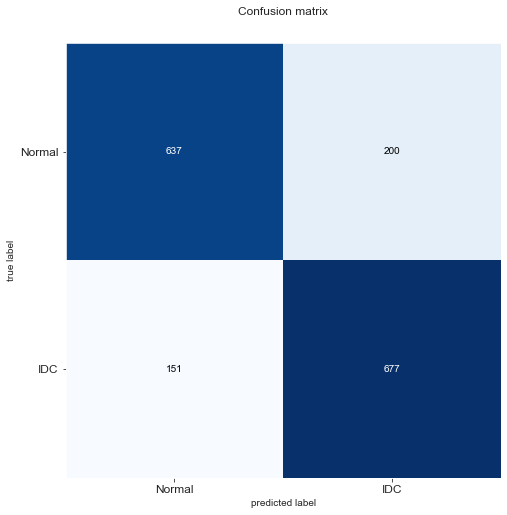

In [47]:
from sklearn.metrics import classification_report,confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

print('Confusion Matrix')
cm=confusion_matrix(np.argmax(Y_test1,axis=1), np.argmax(pred_final,axis=1))
print(cm)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(8,8))
plt.title('Confusion matrix')
plt.xticks(range(2), ['Normal','IDC'], fontsize=12)
plt.yticks(range(2), ['Normal','IDC'], fontsize=12)
plt.show()


In [48]:
print('Classification Report')
target_names = ['Normal', 'IDC']
print(classification_report(Y_test1, pred_final,target_names=target_names))

Classification Report
              precision    recall  f1-score   support

      Normal       0.81      0.76      0.78       837
         IDC       0.77      0.82      0.79       828

   micro avg       0.79      0.79      0.79      1665
   macro avg       0.79      0.79      0.79      1665
weighted avg       0.79      0.79      0.79      1665
 samples avg       0.79      0.79      0.79      1665



In [54]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

def plot_roc_curve(n_classes,Y_test,y_pred):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot of a ROC curve for a specific class
    
    plt.figure()
    plt.plot(fpr[0], tpr[0], linestyle='--',color='orange',label='ROC curve (area = %0.2f) for class Normal' % roc_auc[0])
    plt.plot(fpr[1], tpr[1], linestyle='--',color='green',label='ROC curve (area = %0.2f) for class IDC' % roc_auc[1])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

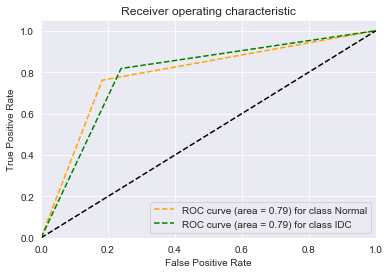

In [55]:
plot_roc_curve(2,Y_test1,pred_final)

In [68]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

def plot_pr_curve(n_classes,Y_test,y_pred):
    lr_precision = dict()
    lr_recall = dict()
    lr_f1 = dict()
    lr_auc =dict()
    for i in range(n_classes):
        lr_precision[i], lr_recall[i], _ = precision_recall_curve(Y_test[:, i], y_pred[:, i])
        lr_f1[i], lr_auc[i] = f1_score(Y_test[:, i], y_pred[:, i]), auc(lr_recall[i], lr_precision[i])

    # Plot of a PR curve for a specific class
    
    plt.figure()
    plt.plot(lr_precision[0], lr_recall[0], linestyle='--',color='orange',label='PR curve (area = %0.2f) for class Normal'%lr_auc[0])
    plt.plot(lr_precision[1], lr_recall[1], linestyle='--',color='green',label='PR curve(area = %0.2f) for class IDC'%lr_auc[1])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower right")
    plt.show()

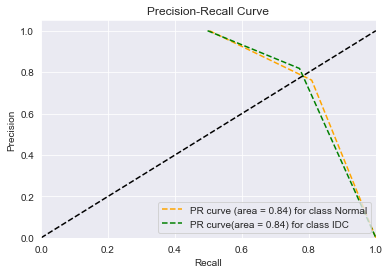

In [69]:
plot_pr_curve(2,Y_test1,pred_final)

2. Train CNN model with laplace filtered histopathological image data

In [70]:
opt = Adam(learning_rate=0.0001)
model2=build_classfier1(opt)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 50, 50, 64)        4864      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 25, 25, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 32)       

In [71]:
#Add data augmentation 
batch_size = 8
train_generator2 = train_datagen.flow(X_train2, Y_train2, batch_size=batch_size)

In [72]:
epochs=100
cnn_history2=history(model1,epochs,X_train2,Y_train2,X_test2,Y_test2,train_generator2)


Epoch 1/100
485/485 [==============================] - 11s 22ms/step - loss: 0.6767 - accuracy: 0.6678 - val_loss: 0.5975 - val_accuracy: 0.6655
Epoch 2/100
485/485 [==============================] - 11s 23ms/step - loss: 0.5634 - accuracy: 0.7166 - val_loss: 0.6056 - val_accuracy: 0.6498
Epoch 3/100
485/485 [==============================] - 11s 23ms/step - loss: 0.5539 - accuracy: 0.7212 - val_loss: 0.5885 - val_accuracy: 0.6871
Epoch 4/100
485/485 [==============================] - 11s 22ms/step - loss: 0.5468 - accuracy: 0.7336 - val_loss: 0.5545 - val_accuracy: 0.7345
Epoch 5/100
485/485 [==============================] - 11s 23ms/step - loss: 0.5355 - accuracy: 0.7308 - val_loss: 0.5437 - val_accuracy: 0.7483
Epoch 6/100
485/485 [==============================] - 12s 24ms/step - loss: 0.5284 - accuracy: 0.7349 - val_loss: 0.5574 - val_accuracy: 0.7345
Epoch 7/100
485/485 [==============================] - 12s 24ms/step - loss: 0.5238 - accuracy: 0.7460 - val_loss: 0.5208 - val_ac

In [73]:
acc = cnn_history2.history['accuracy']
val_acc = cnn_history2.history['val_accuracy']
loss = cnn_history2.history['loss']
val_loss = cnn_history2.history['val_loss']

hist_len= len(cnn_history2.history['loss'])

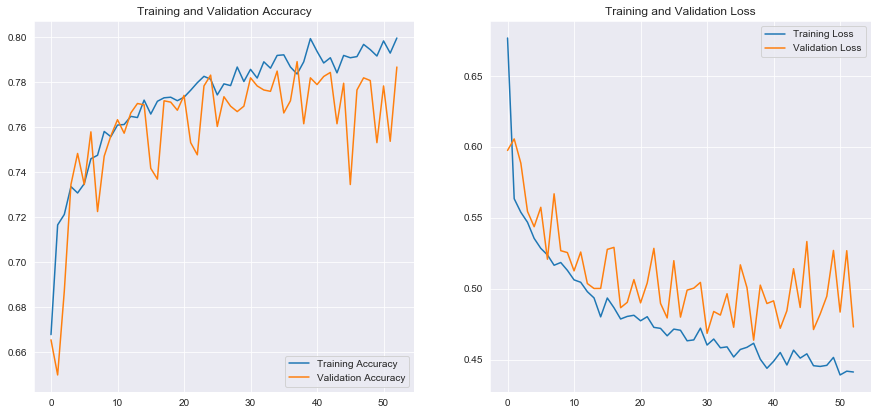

In [74]:
plot_loss_and_accuracy_curve(epochs,acc,val_acc,loss,val_loss,hist_len)

In [75]:

# Evaluate on Validation data


preds2 = model2.predict(X_test2)
pred_final2 = np.where(preds2>0.5,1,0)
pred_final2


array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]])

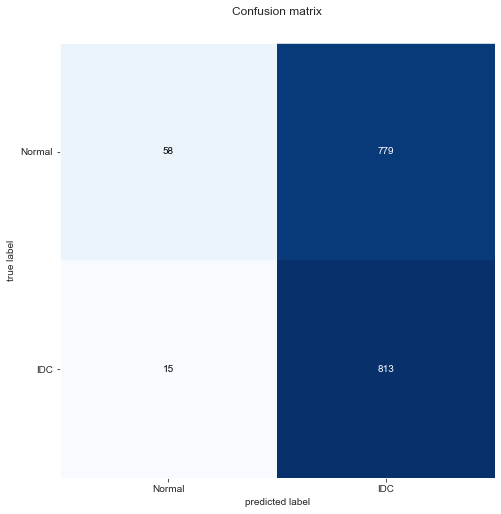

In [77]:
cm2=confusion_matrix(np.argmax(Y_test2,axis=1), np.argmax(pred_final2,axis=1))

fig, ax = plot_confusion_matrix(conf_mat=cm2 ,  figsize=(8,8))
plt.title('Confusion matrix')
plt.xticks(range(2), ['Normal','IDC'], fontsize=10)
plt.yticks(range(2), ['Normal','IDC'], fontsize=10)
plt.show()



In [78]:
print('Classification Report')
target_names = ['Normal', 'IDC']
print(classification_report(Y_test2, pred_final2,target_names=target_names))

Classification Report
              precision    recall  f1-score   support

      Normal       0.79      0.07      0.13       837
         IDC       0.51      0.98      0.67       828

   micro avg       0.52      0.52      0.52      1665
   macro avg       0.65      0.53      0.40      1665
weighted avg       0.65      0.52      0.40      1665
 samples avg       0.52      0.52      0.52      1665



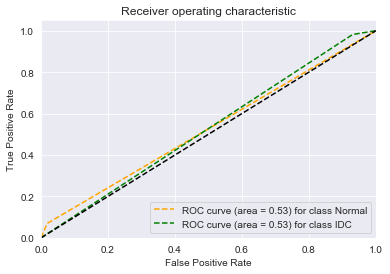

In [79]:
plot_roc_curve(2,Y_test2,pred_final2)

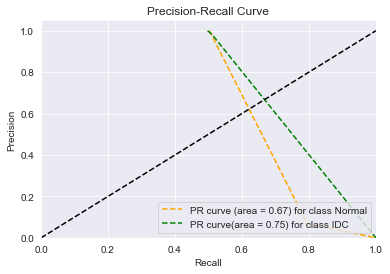

In [80]:
plot_pr_curve(2,Y_test2,pred_final2)

#### 2. Support Vector Machines (SVM)

In [81]:
print(X_train1.shape)
X_train3 = X_train1.reshape((X_train1.shape[0], X_train1.shape[1]*X_train1.shape[2]*X_train1.shape[3]))

X_train3.shape

(3882, 50, 50, 3)


(3882, 7500)

In [82]:
print(X_test1.shape)
X_test3 = X_test1.reshape((X_test1.shape[0], X_test1.shape[1]*X_test1.shape[2]*X_test1.shape[3]))
X_test3.shape

(1665, 50, 50, 3)


(1665, 7500)

In [86]:
Y_train3=np.argmax(Y_train1, axis = 1)
Y_train3.shape

(3882,)

In [87]:
Y_test3=np.argmax(Y_test1, axis = 1)
Y_test3.shape

(1665,)

In [93]:
X_train4 = X_train2.reshape((X_train2.shape[0], X_train2.shape[1]*X_train2.shape[2]*X_train2.shape[3]))
X_test4 = X_test2.reshape((X_test2.shape[0], X_test2.shape[1]*X_test2.shape[2]*X_test2.shape[3]))
Y_train4=np.argmax(Y_train2, axis = 1)
Y_test4=np.argmax(Y_test2, axis = 1)

In [89]:
from sklearn.metrics import roc_curve, auc

def plot_cl_roc(Y_test,y_preds):
    fpr, tpr, thresholds = roc_curve(Y_test, y_preds)
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % roc_auc)
    # Plot ROC curve
    plt.clf()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [91]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

SVM = SVC(random_state=1234)
SVM.fit(X_train3,Y_train3)  
SVM_pred = SVM.predict(X_test3)
# classification report:

print(classification_report(Y_test3, SVM_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       837
           1       0.77      0.78      0.77       828

    accuracy                           0.77      1665
   macro avg       0.77      0.77      0.77      1665
weighted avg       0.77      0.77      0.77      1665



Area under the ROC curve : 0.772427


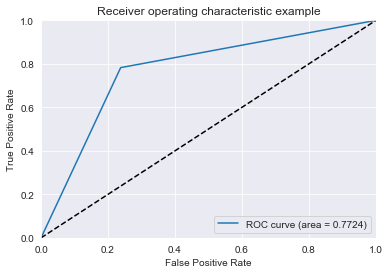

In [92]:
plot_cl_roc(Y_test3,SVM_pred)

In [94]:
SVM = SVC(random_state=1234)
SVM.fit(X_train4,Y_train4)  
SVM_pred = SVM.predict(X_test4)
# classification report:

print(classification_report(Y_test4, SVM_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75       837
           1       0.75      0.73      0.74       828

    accuracy                           0.75      1665
   macro avg       0.75      0.75      0.75      1665
weighted avg       0.75      0.75      0.75      1665



Area under the ROC curve : 0.746442


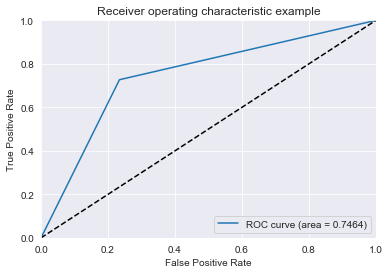

In [95]:
plot_cl_roc(Y_test4,SVM_pred)

#### 4. Random Forest Classifier

In [97]:
from sklearn.ensemble import RandomForestClassifier

RFC= RandomForestClassifier(n_estimators = 100, random_state=1234) 
RFC.fit(X_train3,Y_train3) 
RFC_pred = RFC.predict(X_test3)
print(classification_report(Y_test3, RFC_pred))

C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:552: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:182: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

              precision    recall  f1-score   support

           0       0.79      0.74      0.76       837
           1       0.75      0.79      0.77       828

    accuracy                           0.77      1665
   macro avg       0.77      0.77      0.77      1665
weighted avg       0.77      0.77      0.77      1665



C:\Anaconda3\lib\site-packages\sklearn\ensemble\_base.py:179: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Area under the ROC curve : 0.768908


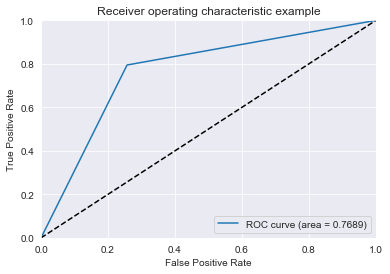

In [98]:
plot_cl_roc(Y_test3,RFC_pred)

In [99]:
RFC= RandomForestClassifier(n_estimators = 100, random_state=1234) 
RFC.fit(X_train4,Y_train4) 
RFC_pred = RFC.predict(X_test4)
print(classification_report(Y_test4, RFC_pred))

C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:552: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:182: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       837
           1       0.75      0.75      0.75       828

    accuracy                           0.75      1665
   macro avg       0.75      0.75      0.75      1665
weighted avg       0.75      0.75      0.75      1665



C:\Anaconda3\lib\site-packages\sklearn\ensemble\_base.py:179: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Area under the ROC curve : 0.751357


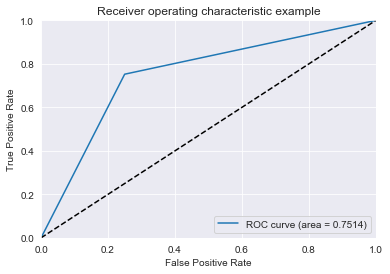

In [100]:
plot_cl_roc(Y_test4,RFC_pred)

### Fine tuning best model

In [119]:
!pip install keras-tuner --upgrade

You should consider upgrading via the 'c:\anaconda3\python.exe -m pip install --upgrade pip' command.
C:\Anaconda3\lib\site-packages\IPython\utils\_process_win32.py:131: ResourceWarning: unclosed file <_io.BufferedWriter name=6>
  return process_handler(cmd, _system_body)
C:\Anaconda3\lib\site-packages\IPython\utils\_process_win32.py:131: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  return process_handler(cmd, _system_body)
C:\Anaconda3\lib\site-packages\IPython\utils\_process_win32.py:131: ResourceWarning: unclosed file <_io.BufferedReader name=8>
  return process_handler(cmd, _system_body)


In [135]:
import keras_tuner as kt

def build_model1(hp):
    model=Sequential()

    model.add(Conv2D(hp.Choice('filters', [128, 64, 32]),kernel_size=(5,5),input_shape=(50, 50,3),activation='relu',padding="same"))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(50, 50,3),activation='relu',padding="same"))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding="same"))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Flatten()) 
    
    model.add(Dense(512,activation='relu'))
    BatchNormalization()
    model.add(Dropout(0.5))
    
    model.add(Dense(128,activation='relu'))
    BatchNormalization()
    model.add(Dropout(0.5))
    
    model.add(Dense(2,activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    print(model.summary())
    return model


In [136]:
tuner1 = kt.RandomSearch(
    build_model1,
    objective='val_loss',
    max_trials=5)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 50, 50, 64)        4864      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 25, 25, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 12, 12, 64)        0         
                                  

In [138]:
tuner1.search(X_train1, Y_train1, epochs=15, validation_data=(X_test1, Y_test1))
best_model = tuner.get_best_models()[0]

INFO:tensorflow:Oracle triggered exit
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)

DataLossError: TensorBundle at .\untitled_project\trial_1\checkpoint shard 0 (6912 bytes): Checksum does not match: stored 2933408179 vs. calculated on the restored bytes 139279919 [Op:RestoreV2]